# Foodhub EDA and Revenue Optimization

### Context

The number of restaurants in New York is increasing rapidly, and many students and working professionals depend on these restaurants because of their busy schedules. Online food delivery services have become a convenient solution, allowing customers to order food from their favorite restaurants with ease.

FoodHub is a food aggregator platform that provides access to multiple restaurants through a single mobile application. Customers can place orders directly through the app, and once the restaurant confirms the order, the platform assigns a delivery partner. The delivery person picks up the order from the restaurant and delivers it to the customer’s location. After receiving the order, the customer can rate the experience in the app. FoodHub generates revenue by charging a fixed commission on each order from the partner restaurants.

### Objective

FoodHub has collected data from customer orders placed through its platform. The company wants to analyze this data to understand customer demand, restaurant performance, and operational efficiency. These insights will help improve customer experience, optimize operations, and support better business decisions.

As a Data Scientist at FoodHub, the goal of this analysis is to explore the order data and answer key business questions provided by the team.

### Data Description

The dataset contains information related to individual food orders placed through the FoodHub platform. Each record represents a single order and includes details about the customer, restaurant, cuisine, cost, timing, and ratings.


### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

Data Source: Kaggle – FoodHub Dataset (https://www.kaggle.com/datasets/tasnimniger/foodhub-data/data)


### Let us start by importing the required libraries and Loading the datasets

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Command to tell Python to actually display the graphs
%matplotlib inline

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the datasets
from google.colab import drive
drive.mount('/content/drive')

file_path="/content/drive/My Drive/Datasets/foodhub_order.csv"
df=pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Checking the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Understanding the structure of the data

In [ ]:
# Checking the shape of the dataset
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


In [ ]:
# Checking the structure and types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Observation:

* There are 6 numerical columns in the data and 8 object type columns.

* It can be observed that no columns have less entries (less than 1898 rows) which indicates that there is no missing values in the data.


In [ ]:
# Checking for missing values in the data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


*It is confirmed that there are **no missing value** in the dataset.*


### Checking the Statistical Summary of the data

In [ ]:
# Statistical summary of the Numerical Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


### Observation:

* Average food preparation time: 27 minutes; Average delivery time: 24 minutes: Preparation takes slightly longer than delivery, suggesting kitchen operations are the main contributor to total order time.

* Average order value: 16.5, with most orders ranging between 12 and 22, showing consistent customer spending.

* Orders are significantly higher on weekends, confirming a clear demand spike during non-working days.

* **Restaurant and cuisine trends:** The platform features 178 unique restaurants, reflecting a diverse food marketplace.Shake Shack is the most frequently ordered restaurant, indicating strong brand preference. There are 14 cuisine types, with American cuisine being the most popular among customers.

### Number of orders that are not rated

In [ ]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


### Observation:
* There are 736 orders that were not rated, showing a gap in feedback collection. Improving the rating process could provide better insights into customer satisfaction


## Exploratory Data Analysis (EDA)
---


### Univariate Analysis

In [ ]:
# Checking the Unique value in categorical (object) column
for col in ['cuisine_type', 'day_of_the_week', 'rating', 'restaurant_name']:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("\n")

Unique values in cuisine_type:
['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


Unique values in day_of_the_week:
['Weekend' 'Weekday']


Unique values in rating:
['Not given' '5' '3' '4']


Unique values in restaurant_name:
['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "

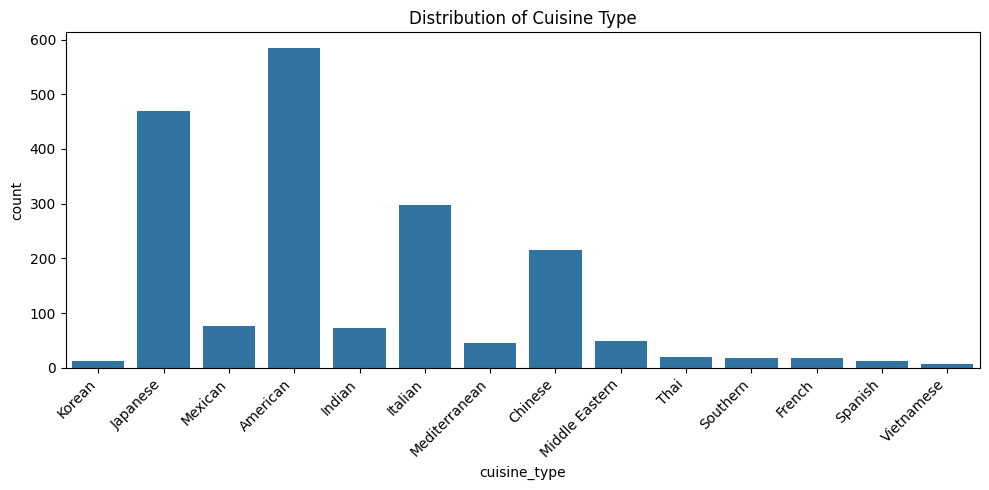

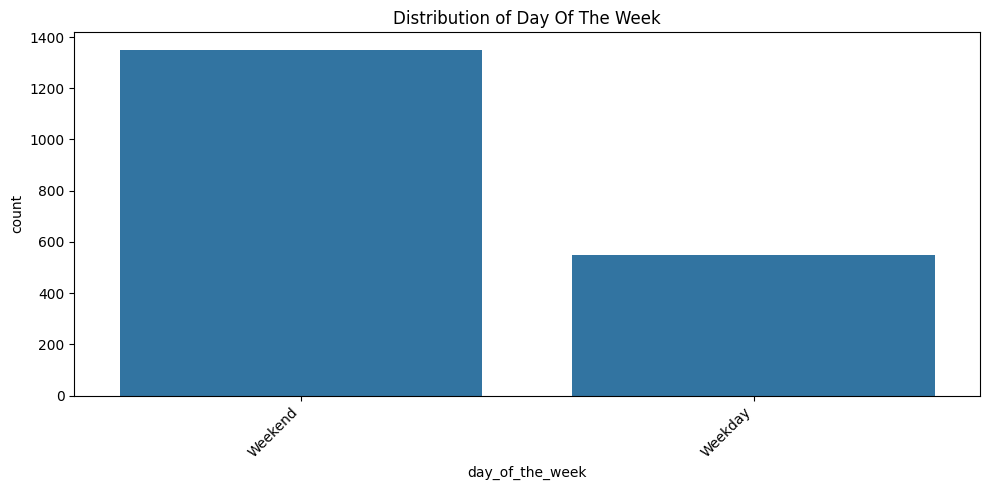

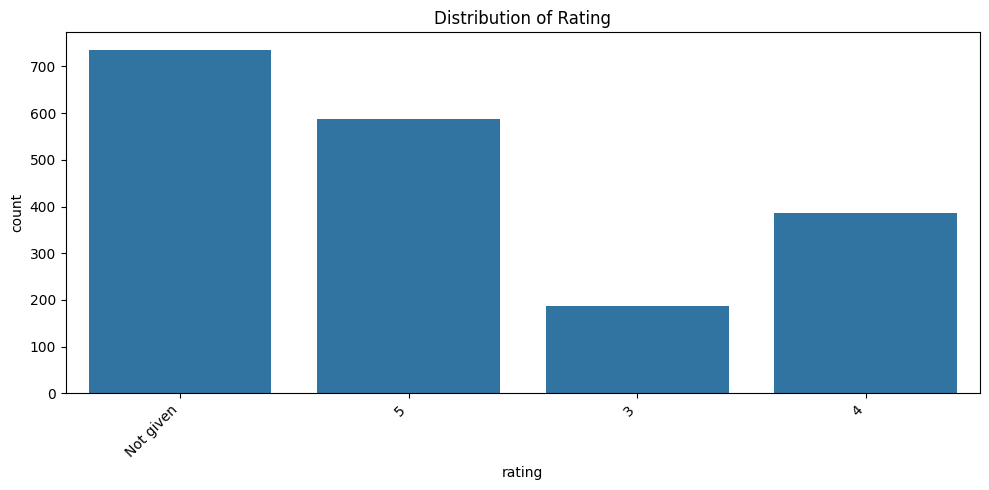

In [ ]:
# Bar Plot
for col in ['cuisine_type', 'day_of_the_week', 'rating']:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### Observation:

* American cuisine and weekend orders drive the majority of revenue.

* A large share of orders have “Not given” ratings, suggesting low customer feedback participation despite generally positive ratings among submitted responses.


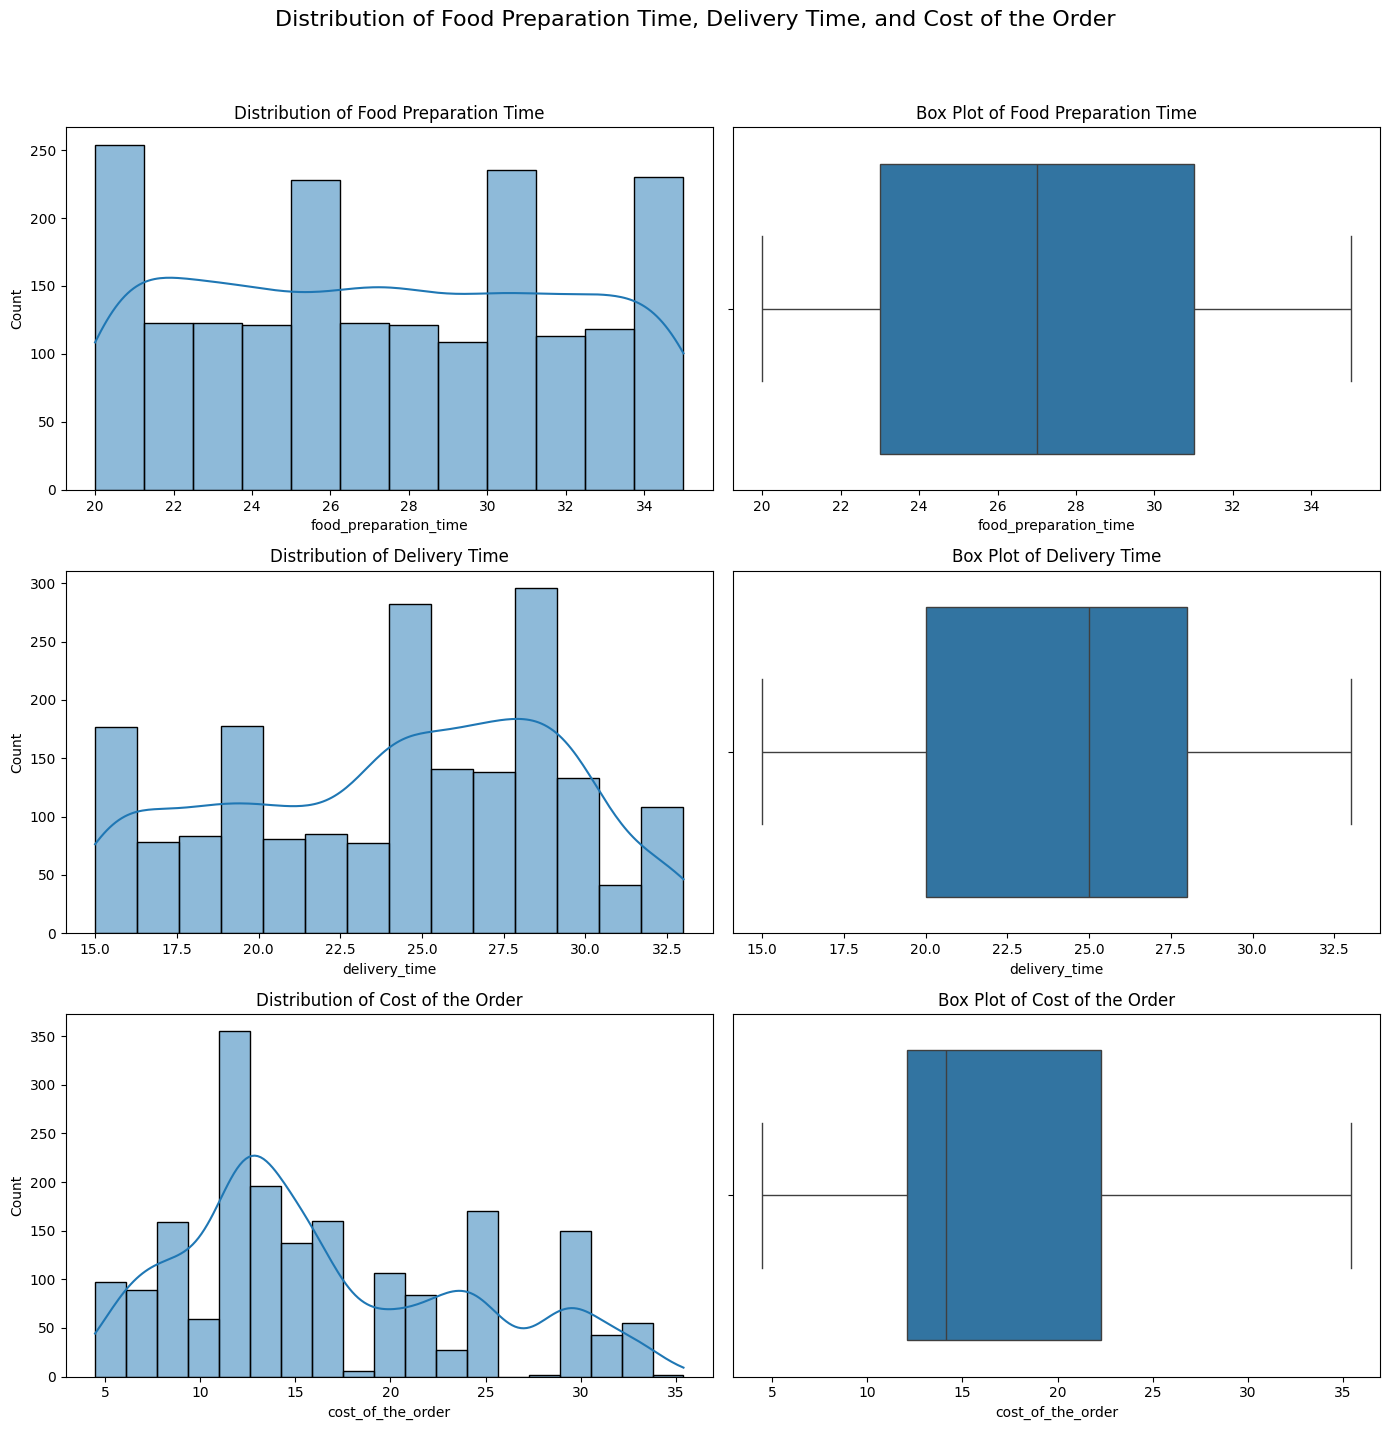

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
fig.suptitle('Distribution of Food Preparation Time, Delivery Time, and Cost of the Order', fontsize=16)

# Food Preparation Time - Histogram
sns.histplot(data=df, x='food_preparation_time', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Food Preparation Time')

# Food Preparation Time - Boxplot
sns.boxplot(data=df, x='food_preparation_time', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Food Preparation Time')

# Delivery Time - Histogram
sns.histplot(data=df, x='delivery_time', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Delivery Time')

# Delivery Time - Boxplot
sns.boxplot(data=df, x='delivery_time', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Delivery Time')

# Cost of the Order - Histogram
sns.histplot(data=df, x='cost_of_the_order', kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Cost of the Order')

# Cost of the Order - Boxplot
sns.boxplot(data=df, x='cost_of_the_order', ax=axes[2, 1])
axes[2, 1].set_title('Box Plot of Cost of the Order')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

#### Observation:

* Food preparation time averages 27 minutes, slightly higher than the average delivery time of 24 minutes, making preparation the main contributor to total order time.

* The average order cost is around 16.5, with most orders concentrated in the mid-price range, indicating consistent customer spending behavior.


**Which are the top 5 restaurants in terms of the number of orders received?**

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


**Which is the most popular cuisine on weekends?**

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().idxmax()

'American'

**What % of the orders cost more than 20 dollars?**


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


**Top 3 Most Frequent Customers**

In [ ]:
# Get the counts of each customer_id
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


## Multivariate Analysis

#### Cuisine vs Cost of the order

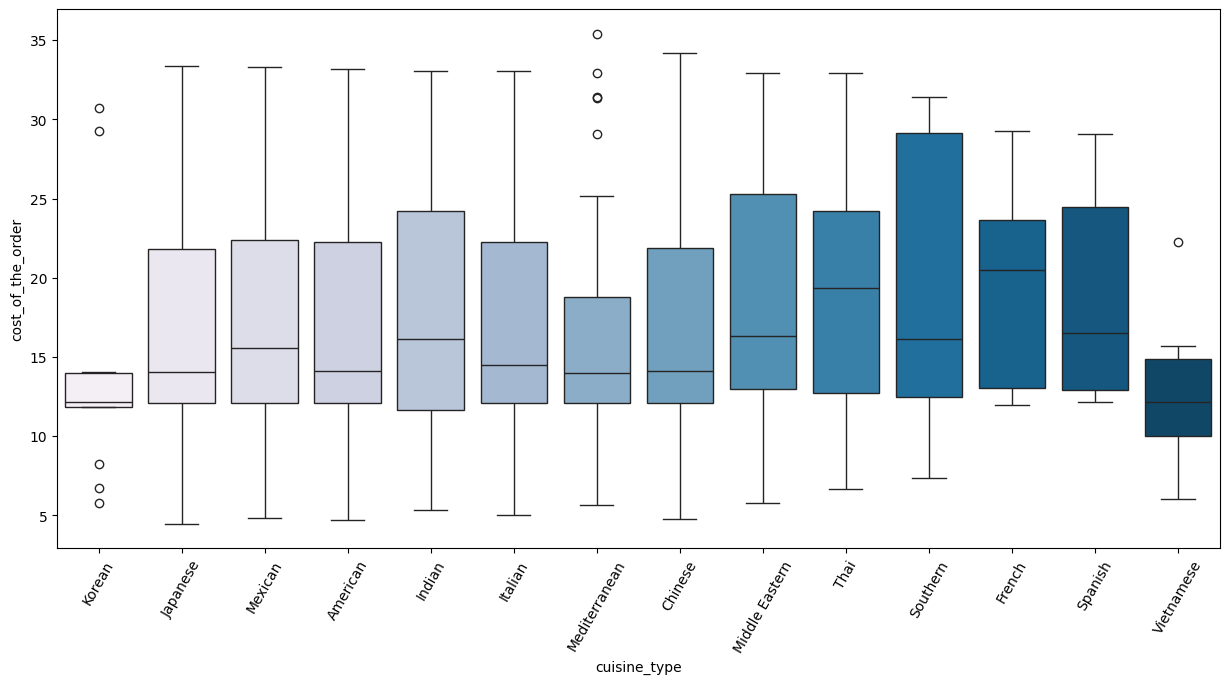

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

* Higher-end cuisines command higher order values, while some cuisines serve as low-cost options.

* Most cuisines fall within the 12–20 cost range, showing a mid-priced market structure.


#### Cuisine vs Food Preparation time

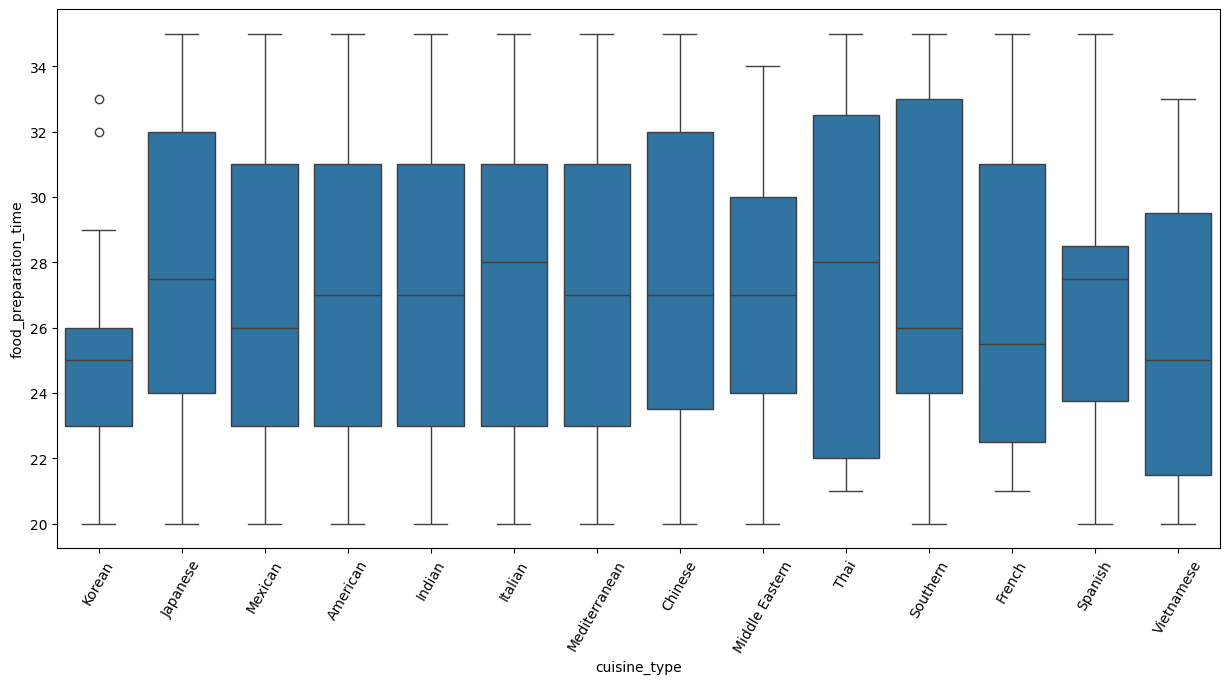

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation = 60)
plt.show()


* Preparation time is operationally stable and not strongly influenced by cuisine type.


#### Day of the Week vs Delivery time

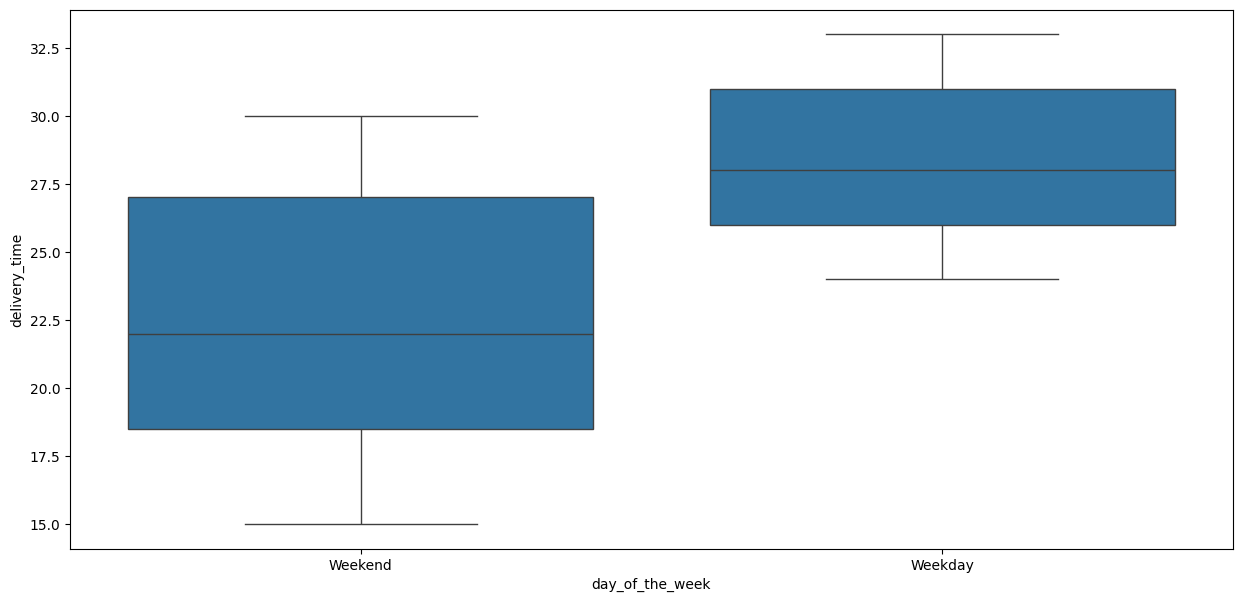

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.show()

* Delivery performance is consistent overall, but weekday deliveries tend to be slightly slower than weekend ones.


#### Restauratnt Name vs Cost of the order

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


* Revenue is concentrated among a few top restaurants, particularly Shake Shack.

#### Rating vs Delivery time

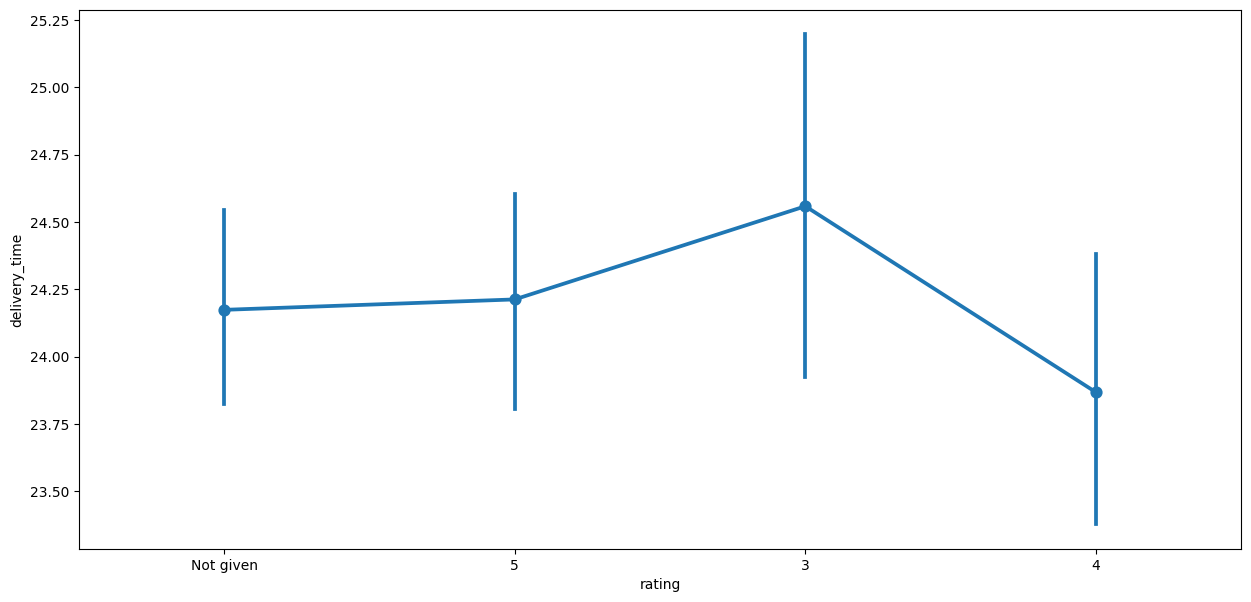

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

* Orders with a rating of 3 show the highest average delivery time and the widest variation.

* Delivery time variability is more closely linked to lower ratings than preparation time.

#### Rating vs Food preparation time

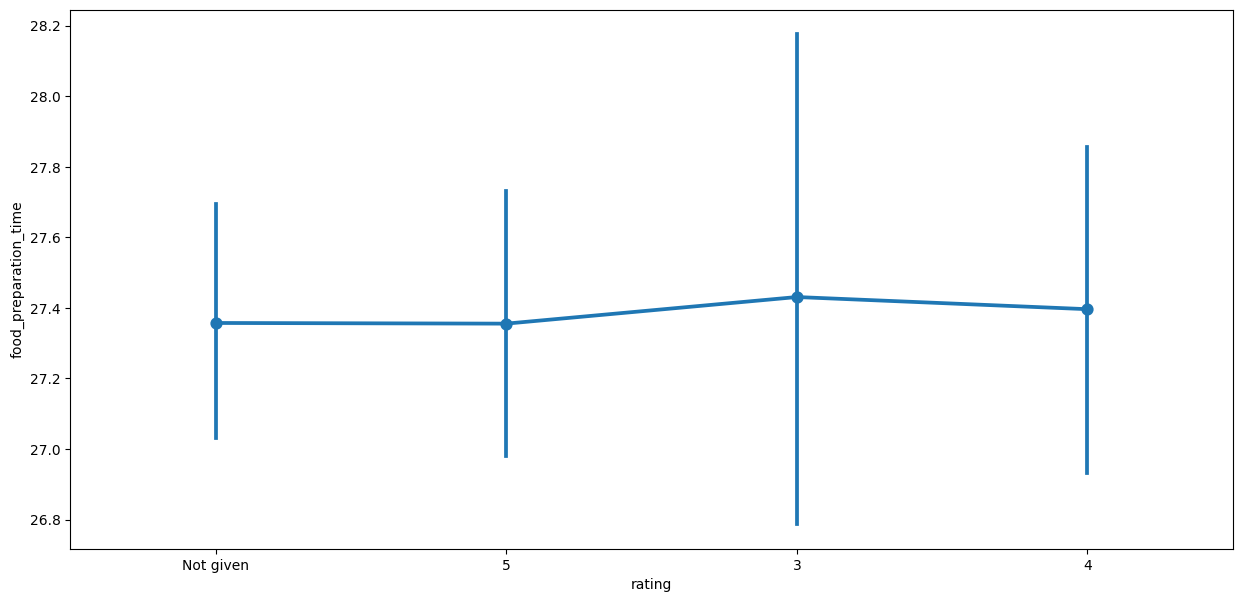

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df)
plt.show()

#### Rating vs Cost of the order

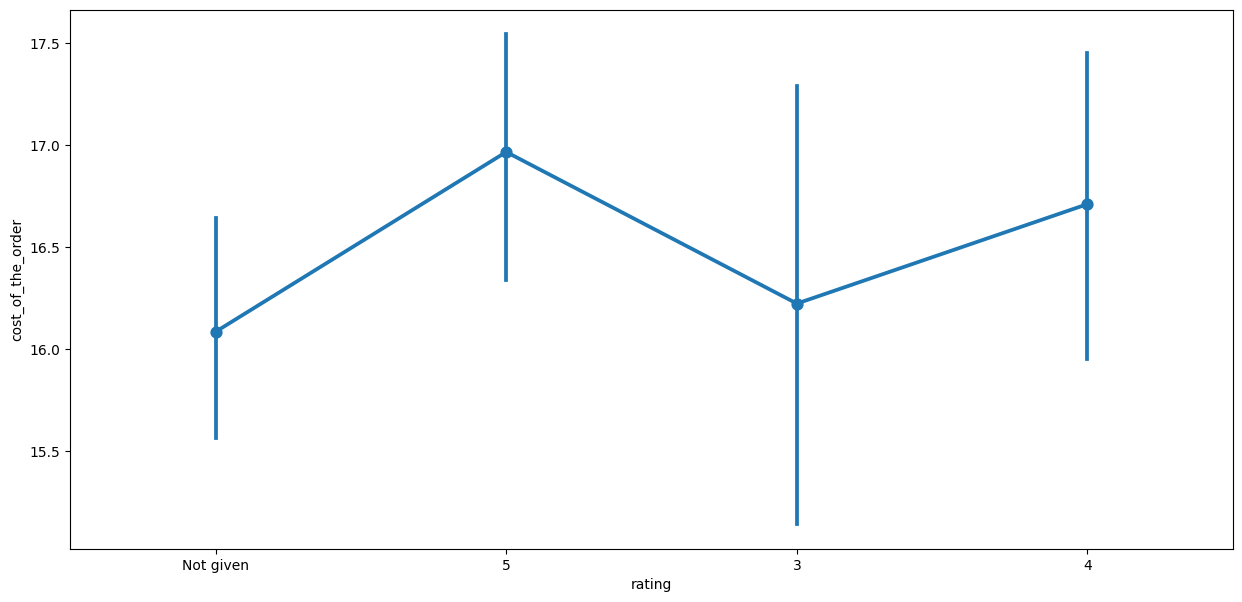

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df)
plt.show()

* Customer satisfaction appears to increase with order value.


#### Correlation Check

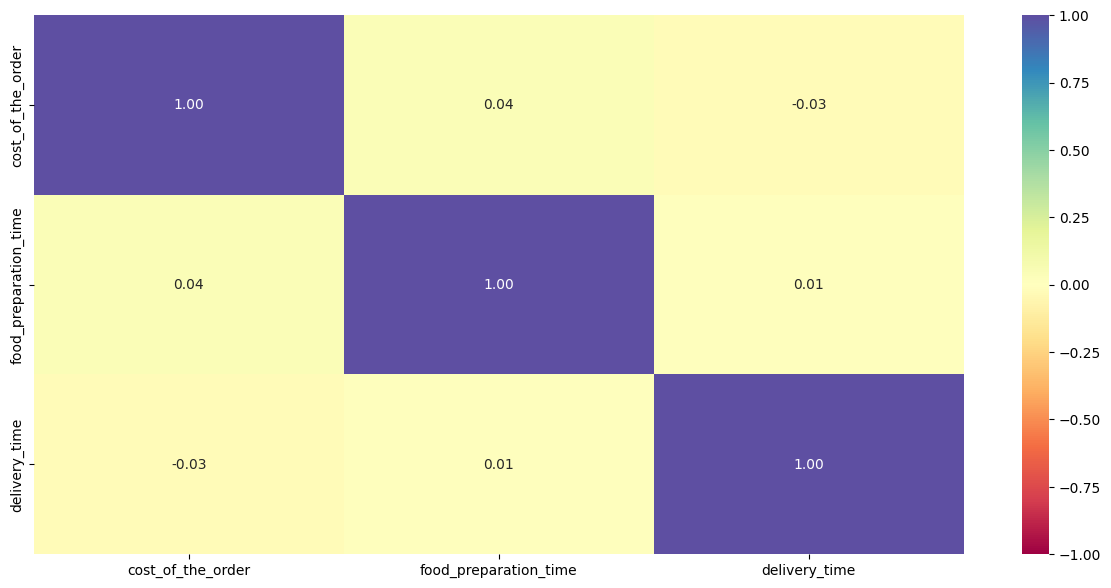

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Correlation values among cost, preparation time, and delivery time are near zero. Operational metrics behave as separate systems, not strongly influencing each other.

### **Real World Scenario:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Finding
 the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


Only a small subset of restaurants meets both quality and popularity criteria, indicating that the promotional offer is highly selective and targets consistently high-performing restaurants.

### **Real World Scenario:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Finding the net revenue generated by the company across all orders.

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars



* The total net revenue generated by the company is approximately $6,166.30 using the defined commission rates.

* Most company revenue is generated from mid- to high-value orders, making higher-priced transactions a key driver of platform earnings.


### **Real World Scenario:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered).


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate percentage of orders > 60 mins
total_orders = df.shape[0]
orders_gt_60 = df[df['total_time'] > 60].shape[0]
percentage = (orders_gt_60 / total_orders) * 100
print(f"Percentage of orders taking more than 60 minutes: {percentage:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%



* About 10.54% of orders take longer than 60 minutes to complete (preparation + delivery). This highlights a potential area for operational improvement.



### **Real World Scenario:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes



* The mean delivery time on weekdays is around 28 minutes, whereas on weekends it is around 22 minutes. Delivery is faster on weekends.


## Actionable Insights and Recommendations

### Insights

1. **Demand concentration:** American cuisine and a few top restaurants generate the majority of orders and revenue.

2. **Stable spending pattern:** Average order value is about $16.5, with most orders in the mid-price range.

3. **Operational balance:** Preparation time (~27 min) is slightly higher than delivery time (~24 min), but both are consistent.

4. **Delivery impacts satisfaction:** Lower ratings are associated with slower and more variable delivery times.

5. **Low feedback participation:** A large share of orders have no ratings, limiting service quality insights.

6. **High-value orders drive results:** Higher-cost orders contribute more to both revenue and customer satisfaction.

7. **Weekend efficiency:** Deliveries are faster on weekends despite higher demand.

8. **Improvement opportunity:** About 10.5% of orders exceed 60 minutes, indicating operational delays.

### Recommendations

* **Improve delivery efficiency**, especially on weekdays, to reduce low-rating incidents.

* **Encourage customer feedback** through incentives and simplified rating processes.

* **Promote high-performing restaurants** and popular cuisines to drive revenue.

* **Increase average order value** through bundles, upselling, and premium offerings.

* **Optimize kitchen operations** to reduce total order completion time.

### **Conclusion**

The Analysis shows stable operations and consistent customer spending, with demand concentrated among a few cuisines and top-performing restaurants. Delivery performance has the strongest impact on customer satisfaction, while higher-value orders drive both revenue and ratings. By improving delivery efficiency, increasing feedback participation, and promoting high-value transactions, the company can enhance customer experience and overall profitability.